In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("DataAnalysisCourseMaterials/DataAnalysis/data/titanic.csv")

In [7]:
titanic["age"] = titanic["age"].replace(["?"],[None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"],[None]).astype("float")

In [9]:
def years_to_days(yrs):
    return yrs*365 
titanic["age"].apply(years_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [10]:
def get_age_group(age):
    if age < 2:
        return "infant"
    elif age < 12:
        return "child"
    elif age < 18:
        return "teen"
    elif age < 50:
        return "adult"
    else:
        return "senior"

In [12]:
titanic["age_group"] = titanic["age"].apply(get_age_group)

In [13]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",infant
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,teen
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,senior
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,adult


In [17]:
titanic.groupby(["age_group","sex"]).survived.mean()

age_group  sex   
adult      female    0.748201
           male      0.186508
child      female    0.515152
           male      0.472222
infant     female    0.888889
           male      0.692308
senior     female    0.698276
           male      0.140078
teen       female    0.833333
           male      0.151515
Name: survived, dtype: float64

<AxesSubplot:xlabel='sex'>

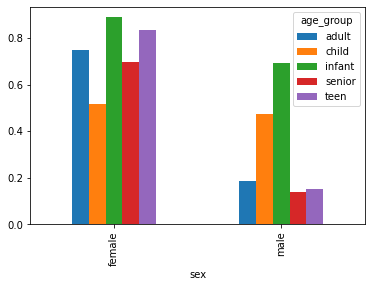

In [23]:
titanic.groupby(["age_group","sex"]).survived.mean().unstack(level=0).plot.bar()

In [24]:
titanic["fare"] * 23

0       4860.7625
1       3485.6500
2       3485.6500
3       3485.6500
4       3485.6500
          ...    
1304     332.4466
1305     332.4466
1306     166.1750
1307     166.1750
1308     181.1250
Name: fare, Length: 1309, dtype: float64

In [26]:
titanic["fare"].apply(lambda x: f"${x*24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [27]:
def convert_currency(num,multiplier):
    return f"${num * multiplier}"

In [29]:
convert_currency(2,24)

'$48'

In [32]:
titanic["fare"].apply(convert_currency,args=(24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [43]:
df = titanic[["pclass","survived","age","fare"]]

In [44]:
def get_range(s):
    # print(s)
    return s.max() - s.min()

In [46]:
df.apply(get_range,axis=1)

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [47]:
def get_fam_size(s):
    fam_size = s.sibsp + s.parch
    if fam_size == 0:
        return "solo"
    elif fam_size < 5:
        return "average"
    else:
        return "large"

In [52]:
titanic["fam_size"]=titanic.apply(get_fam_size,axis=1)

In [53]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,fam_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult,solo
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",infant,average
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",child,average
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult,average
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,teen,average
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,senior,average
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,adult,solo
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,adult,solo


<AxesSubplot:xlabel='fam_size'>

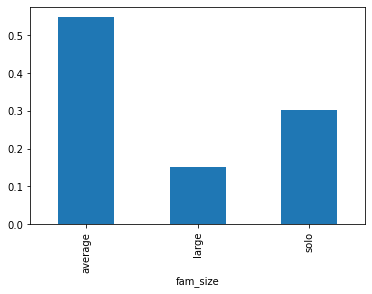

In [57]:
titanic.groupby("fam_size")["survived"].mean().plot.bar()

<AxesSubplot:xlabel='fam_size'>

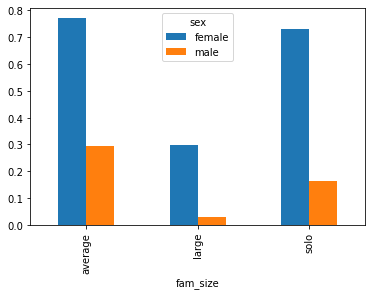

In [61]:
titanic.groupby(["fam_size","sex"]).survived.mean().unstack().plot.bar()

In [62]:
titanic["pclass"].map({
    1:"1st",
    2:"2nd",
    3:"3rd"
})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [63]:
titanic["age"].map(lambda a:a < 18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [66]:
titanic[["name","sex","age_group"]].applymap(str.upper)

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILD
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT


In [68]:
df.applymap(lambda el: el *7)

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [69]:
titanic[["name","sex","age_group"]].applymap(len)

,name,sex,age_group
0,29,6,5
1,30,4,6
2,28,6,5
3,36,4,5
4,47,6,5
...,...,...,...
1304,20,6,4
1305,21,6,6
1306,25,4,5
1307,19,4,5
